# Classification Uncertainty Analysis in Bayesian Deep Learning with Dropout Variational Inference

Here is [astroNN](https://github.com/henrysky/astroNN), please take a look if you are interested in astronomy or how neural network applied in astronomy
* **Henry Leung** - *Astronomy student, University of Toronto* - [henrysky](https://github.com/henrysky)
* Project adviser: **Jo Bovy** - *Professor, Department of Astronomy and Astrophysics, University of Toronto* - [jobovy](https://github.com/jobovy)
* Contact Henry: henrysky.leung [at] utoronto.ca
* This tutorial is created on 16/Mar/2018 with Keras 2.1.5, Tensorflow 1.6.0, Nvidia CuDNN 7.0 for CUDA 9.0 (Optional)
* Updated on 31/Jan/2020 with Tensorflow 2.1.0, Tensorflow Probability 0.9.0

<br>
For more resources on Bayesian Deep Learning with Dropout Variational Inference, please refer to [README.md](https://github.com/henrysky/astroNN/tree/master/demo_tutorial/NN_uncertainty_analysis)

#### First import everything we need

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import numpy as np
import pylab as plt

from astroNN.models import MNIST_BCNN

# disable eager execution to prevent potential error
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


### Train the neural network on MNIST training set

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = utils.to_categorical(y_train, 10)
y_train = y_train.astype(np.float32)
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

# Create a astroNN neural network instance and set the basic parameter
net = MNIST_BCNN()
net.task = 'classification'
net.max_epochs = 5  # Just use 5 epochs for quick result

# Trian the nerual network
net.train(x_train, y_train)

Number of Training Data: 54000, Number of Validation Data: 6000
====Message from Normalizer====
You selected mode: 255
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
Epoch 1/5
843/843 - 10s - loss: 196.7250 - output_loss: 196.6318 - variance_output_loss: 196.6327 - output_categorical_accuracy: 0.5588 - val_loss: 1.3690 - val_output_loss: 1.2703 - val_variance_output_loss: 1.2703 - val_output_categorical_accuracy: 0.6764
Epoch 2/5
Epoch 1/5
843/843 - 6s - loss: 1.1469 - output_loss: 1.0452 - variance_output_loss: 1.0452 - output_categorical_accuracy: 0.7241 - val_loss

### Test the neural network on random MNIST images

You can see from below, most test images are right except the last one the model has a high uncertainty in it. As a human, you can indeed can argue this 5 is badly written can can be read as 6 or even a badly written 8.

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Starting Dropout Variational Inference
Instructions for updating:
Please use Model.predict, which supports generators.
Completed Dropout Variational Inference with 100 forward passes, 0.40s elapsed


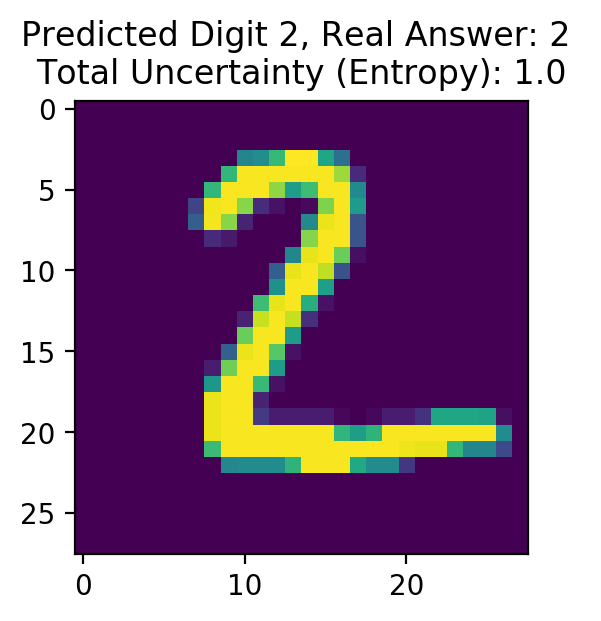

<Figure size 432x288 with 0 Axes>

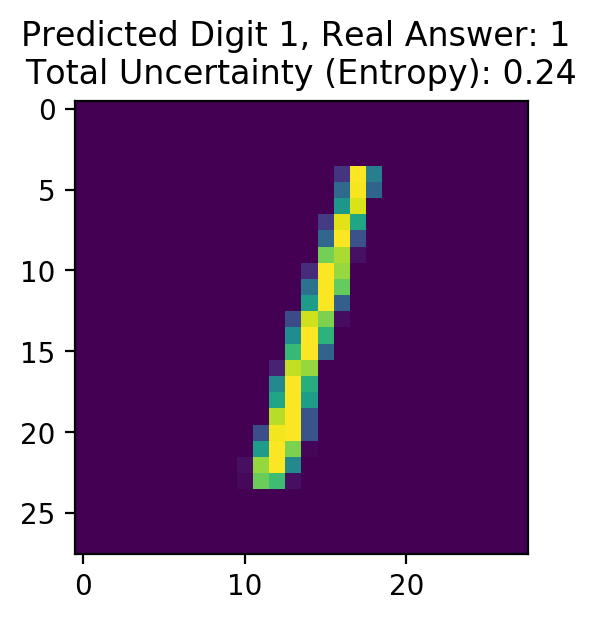

<Figure size 432x288 with 0 Axes>

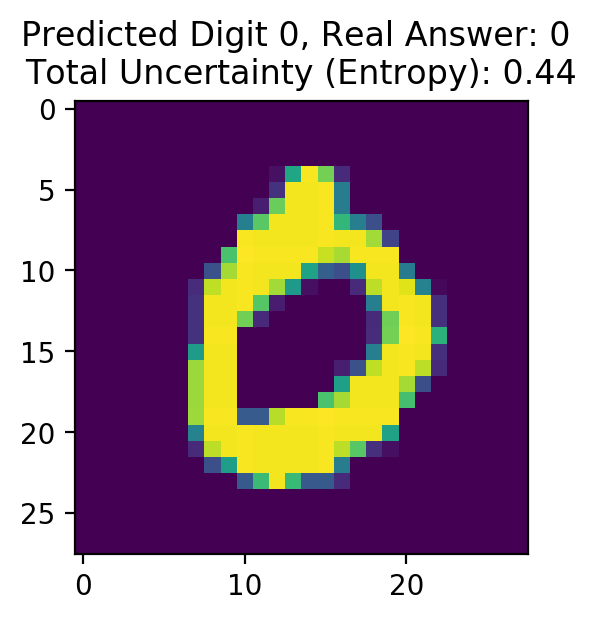

<Figure size 432x288 with 0 Axes>

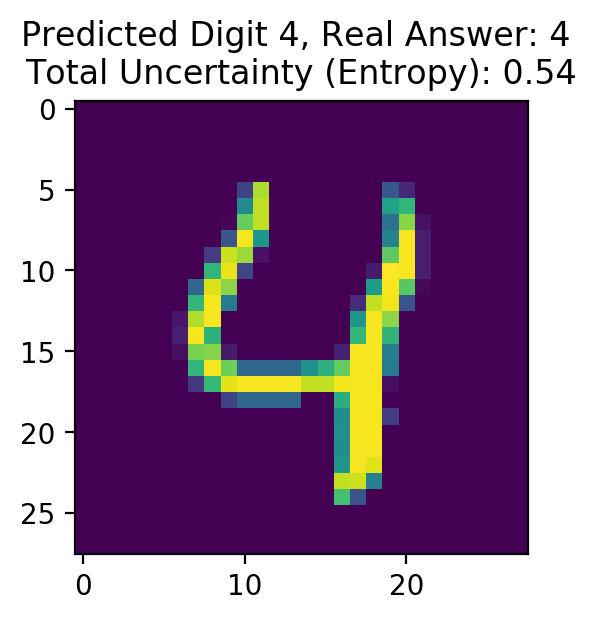

<Figure size 432x288 with 0 Axes>

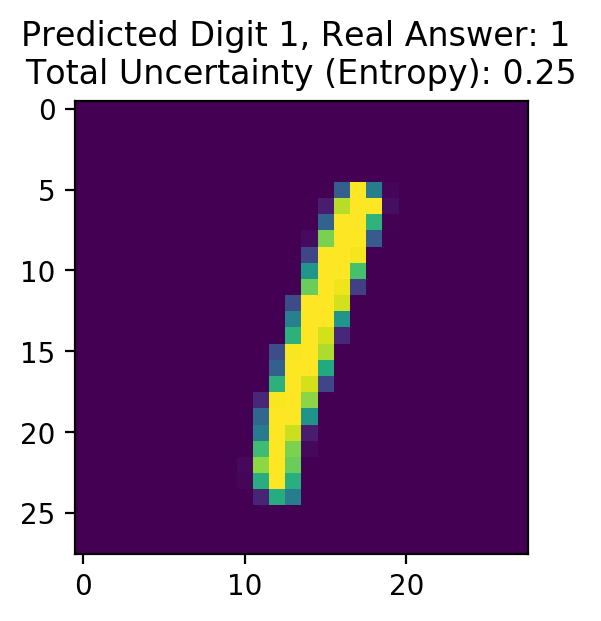

<Figure size 432x288 with 0 Axes>

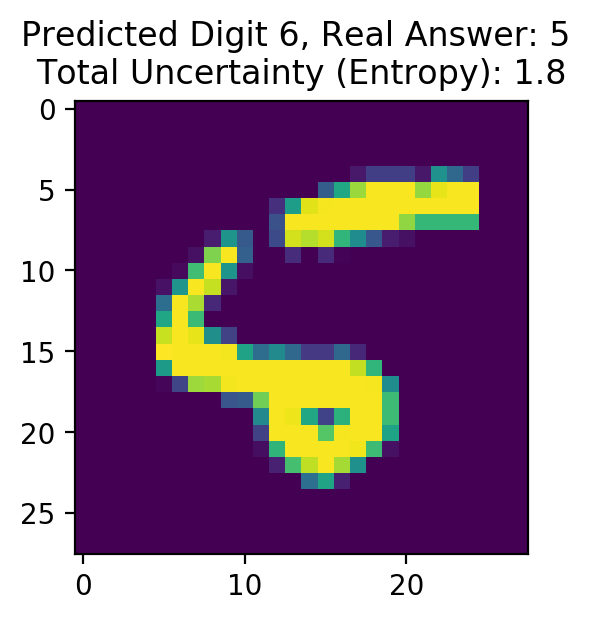

<Figure size 432x288 with 0 Axes>

In [4]:
test_idx = [1, 2, 3, 4, 5, 8]
pred, pred_std = net.test(x_test[test_idx])
for counter, i in enumerate(test_idx):
    plt.figure(figsize=(3, 3), dpi=100)
    plt.title(f'Predicted Digit {pred[counter]}, Real Answer: {y_test[i]:{1}} \n'
              f'Total Uncertainty (Entropy): {(pred_std["total"][counter]):.{2}}')
    plt.imshow(x_test[i])
    plt.show()
    plt.close('all')
    plt.clf()

### Test the neural network on random MNIST images with 90 degree rotation

Since the neural network is trained on MNIST images without any data argumentation, so if we rotate the MNIST images, the images should look 'alien' to the neural network and the neural network should give us a high unceratinty. And indeed the neural network tells us its very uncertain about the prediction with roated images.

Starting Dropout Variational Inference
Completed Dropout Variational Inference with 100 forward passes, 0.30s elapsed


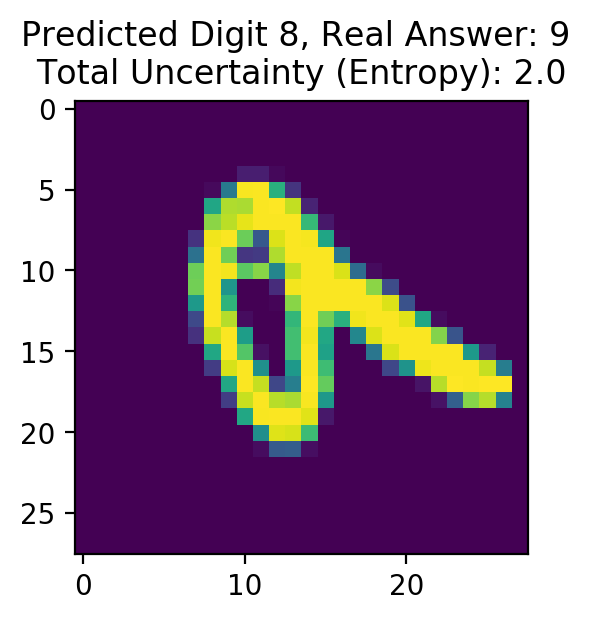

<Figure size 432x288 with 0 Axes>

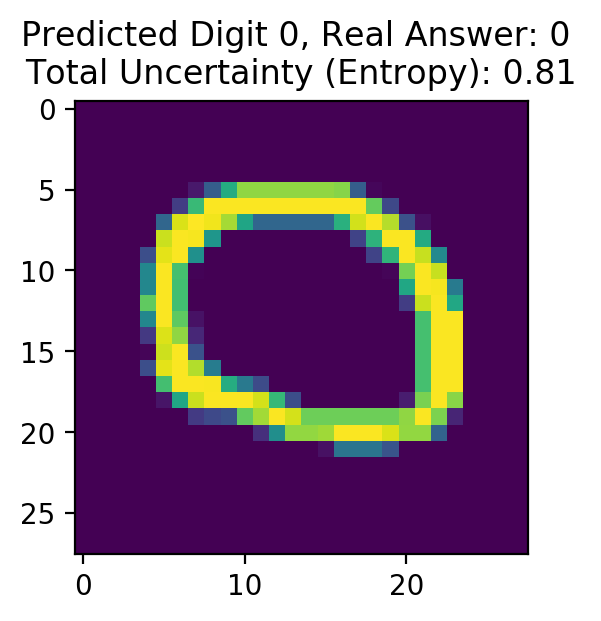

<Figure size 432x288 with 0 Axes>

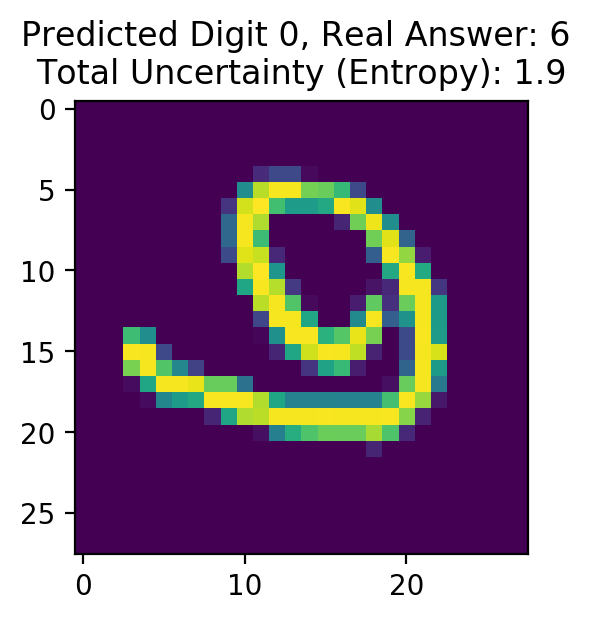

<Figure size 432x288 with 0 Axes>

In [5]:
test_rot_idx = [9, 10, 11]

test_rot = x_test[test_rot_idx]

for counter, j in enumerate(test_rot):
    test_rot[counter] = np.rot90(j)

pred_rot, pred_rot_std = net.test(test_rot)

for counter, i in enumerate(test_rot_idx):
    plt.figure(figsize=(3, 3), dpi=100)
    plt.title(f'Predicted Digit {pred_rot[counter]}, Real Answer: {y_test[i]:{1}} \n'
              f'Total Uncertainty (Entropy): {(pred_rot_std["total"][counter]):.{2}}')
    plt.imshow(test_rot[counter])
    plt.show()
    plt.close('all')
    plt.clf()